# STAT207 Final Project - What Makes a Highly Rated Video Game?

Afif Shomali, Jasmine Yan, Wentian Wang, Wahid Nasir, Dev Udata

In [2]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## 1. Introduction

### Motivation

We are looking to create a model that predicts "Highly Rated" video games in new datasets. For our purposes, a game is "Highly Rated" if it has a Metric.Review.Score of greater than 80. This model would let a person know which explanatory variables are most important when creating a highly rated & successful video game. We think that video game developers could find our model useful as it would let them know what aspects of a video game to focus on to be more successful when developing a game. We think that that these type of people would care more about classify "positives" of the response variable as that would give them more information on what makes a successful video game rather than a poorly rated one. However, it would also be beneficial if the classifier is good with "negatives" as it would ensure we aren't classifying many low rated video games as highly rated.

Reference: Does a game review heavily affect game purchases? | CS Agents. (2018, September 19). Social App Support. https://cs-agents.com/blog/game-review-affect-game-purchases/

### Primary Reasearch Goal

In this project our primary research goal will be to build a predictive model that will perform the best when predicting "Highly Rated" video games for new video games given some combination of the other remaining explanatory variables. For our purposes, a video game is considered "Highly Rated" when it has ``Metric.Review.Score`` of greater than 80. We will create our own response variable with 2 levels based on this review score and constraint to categorize games.


### Secondary Research Goal

Our secondary research goal is to have a model that has reliable interpretative insights about the nature of the relationship between the variables in the dataset. We would also like to thoroughly describe the nature of the variables and well as the relationships between the variables that we would like to use in our model.



## 2. Dataset Discussion

We will be using the Video Games Dataset collect by Dr. Joe Cox. This dataset features games released from 2004 to 2010 with a variety of information about these games including Sales, Ratings, Review Scores, Platform, Genre as well as playtime information.
Below we can see the first few rows of the dataset.


In [3]:
df = pd.read_csv("video_games.csv", na_values = "Unknown")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [4]:
df.shape[0]

1212

This Dataset contains 1212 rows

### Data Source: 
1. We look for this from the Mini-project specification.pdf, so it already existed in our team's mini-project file. And its original website is From the CORGIS Dataset Project. 
2. here is the link: https://corgis-edu.github.io/corgis/csv/video_games/ 
3. Our team downloads this file in 2023/11/15.

### Original Dataset Information:

Each row represents one video game, this data was collected by Dr. Joe Cox and was used in his analysis of US video game sales data. 
The playtime part of the dataset was crowd sourced from "How long to Beat". This dataset isn't inclusive of all possible observations, as it does not include data about video games released after 2010 and before 2004. So more recent video game titles from the past 10 years aren't included. This may be of importance to someone using this model as video games released more recently may have different aspects of them that make them more successful. 

### Selected Variables:

1. Response variable: Metrics.Review Score: this variable stands for the review score of the video games after they purchased and played this game. The purpose of using this variable is that we should determined a game with score over 80, and  they are classified as "Highly Rated".
2. Expanatory variable: 
1) Features.Max Players: this variable ndicates the maximum number of players supported in a game.
2) Metadata.Genres: it represents the genre(s) of the video game, providing insight into its categorization to let game players to choose.
3) Metadata.Publishers: The game companys which released their games are publishers.
4) Metrics.Sales: it reflects the sales performance of the game, whether the games sold well or bad.
5) Metrics.Used Price: it represents the average price that we need to pay for this games.	
6) Release.Console: it is the gaming console or platform on which the game was released.
7) Release.Rating: this is the people's rating after the games released, and it may reflected the players' expectation of these games.
8) Release.Year: the year that game released.
9) Length.All PlayStyles.Average: the players' average time for the game, it may reflected if games are good or not.
3. Reasoning for Selection:
These explanatory variables were chosen due to their potential influence on a game's success and rating. These variables may change user perception, market performance, and game design choices and influence the review score of the game.

## 3. Dataset Cleaning

During our dataset cleaning we will add the categorical variable that we will be trying to predict, handle any Null or missing values. We will also get rid of some of the unecessary columns that we won't be using for a model.

First we will handle any Null or missing values appropriately. The only column with NaN values is the publisher column, for simplicity we will replace those values with "Unknown". 

In [5]:
print(df.columns[df.isna().any()])


df["Metadata.Publishers"] = df["Metadata.Publishers"].fillna("Unknown")

Index(['Metadata.Publishers'], dtype='object')


In [6]:
df.isna().sum()

Title                            0
Features.Handheld?               0
Features.Max Players             0
Features.Multiplatform?          0
Features.Online?                 0
Metadata.Genres                  0
Metadata.Licensed?               0
Metadata.Publishers              0
Metadata.Sequel?                 0
Metrics.Review Score             0
Metrics.Sales                    0
Metrics.Used Price               0
Release.Console                  0
Release.Rating                   0
Release.Re-release?              0
Release.Year                     0
Length.All PlayStyles.Average    0
Length.All PlayStyles.Leisure    0
Length.All PlayStyles.Median     0
Length.All PlayStyles.Polled     0
Length.All PlayStyles.Rushed     0
Length.Completionists.Average    0
Length.Completionists.Leisure    0
Length.Completionists.Median     0
Length.Completionists.Polled     0
Length.Completionists.Rushed     0
Length.Main + Extras.Average     0
Length.Main + Extras.Leisure     0
Length.Main + Extras

We will remove any columns that we won't be using or won't be helpful. For examples some columns have the exact same value for all the datapoints so they wouldn't be beneficial in helping us predict highly rated games. This also will let us build a simpler & more interpretable model which helps us with our secondary research goal. 

In [7]:
df = df[["Metadata.Publishers", "Metrics.Review Score", "Metrics.Sales",
        "Metrics.Used Price", "Release.Console", "Release.Rating",
        "Release.Year", "Length.All PlayStyles.Average"]]

In [8]:
df.head(5)

,Metadata.Publishers,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average
0,Nintendo,85,4.69,24.95,Nintendo DS,E,2004,22.716667
1,Ubisoft,89,0.56,14.95,Sony PSP,E,2004,10.100000
2,Nintendo,81,0.54,22.95,Nintendo DS,E,2004,4.566667
3,Sony,81,0.49,12.95,Sony PSP,E,2004,0.000000
4,Activision,61,0.45,14.95,Nintendo DS,E,2004,13.250000


Next we add the ``Highly.Rated`` Response variable that we will be trying to predict, as we see below there is a significant enough amount of rows for both games that are considered highly rated and those games that are not considered highly rated.

In [9]:
df["Highly.Rated"] = df['Metrics.Review Score'].apply(lambda x: 1 if x >= 80 else 0)
df["Highly.Rated"].value_counts()

0    930
1    282
Name: Highly.Rated, dtype: int64

Finally we will double check for any implicit missing values in this dataset in the remaining columns that we plan on using. Based on the datatypes & looking at the unique values, we don't see any implicitly missing values.

In [10]:
df.dtypes

Metadata.Publishers               object
Metrics.Review Score               int64
Metrics.Sales                    float64
Metrics.Used Price               float64
Release.Console                   object
Release.Rating                    object
Release.Year                       int64
Length.All PlayStyles.Average    float64
Highly.Rated                       int64
dtype: object

In [11]:
df["Release.Rating"].unique()

array(['E', 'M', 'T'], dtype=object)

In [12]:
df["Release.Console"].unique()

array(['Nintendo DS', 'Sony PSP', 'X360', 'Nintendo Wii', 'PlayStation 3'],
      dtype=object)

In [13]:
df = df[["Metadata.Publishers",  "Metrics.Sales",
        "Metrics.Used Price", "Release.Console", "Release.Rating",
        "Release.Year", "Length.All PlayStyles.Average", "Highly.Rated"]]
df.head()

,Metadata.Publishers,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average,Highly.Rated
0,Nintendo,4.69,24.95,Nintendo DS,E,2004,22.716667,1
1,Ubisoft,0.56,14.95,Sony PSP,E,2004,10.100000,1
2,Nintendo,0.54,22.95,Nintendo DS,E,2004,4.566667,1
3,Sony,0.49,12.95,Sony PSP,E,2004,0.000000,1
4,Activision,0.45,14.95,Nintendo DS,E,2004,13.250000,0


After analysis, we decide not to drop any rows because there is no NaN values and the dtypes are all correspond with the column. 

Outlier Cleaning - Two Variable Outlier Inspection (numerical)

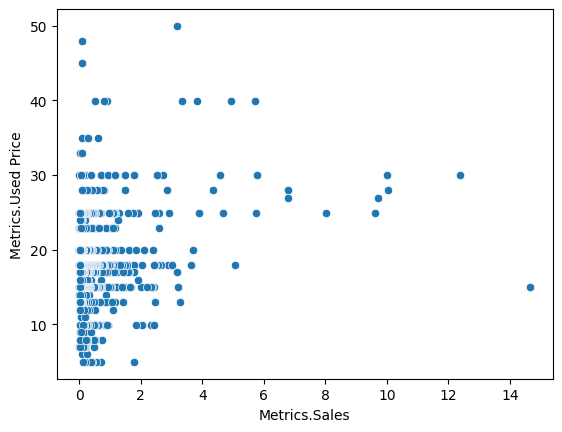

In [14]:
sns.scatterplot(x='Metrics.Sales', y='Metrics.Used Price', data=df)
plt.show()

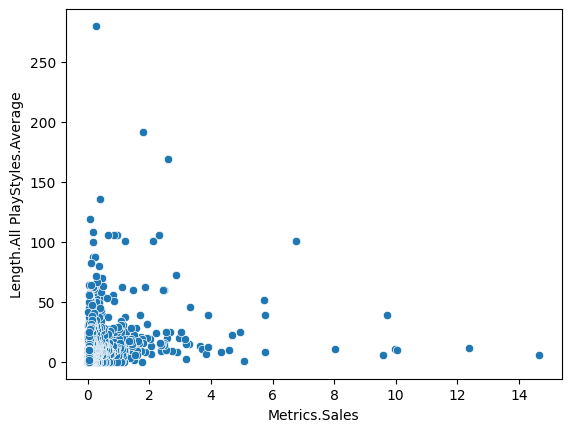

In [15]:
sns.scatterplot(x='Metrics.Sales', y='Length.All PlayStyles.Average', data=df)
plt.show()

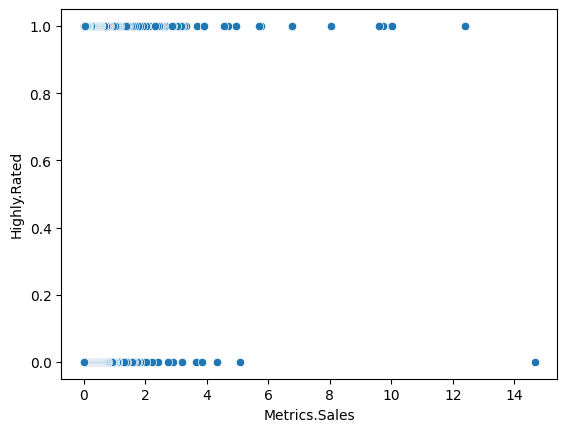

In [16]:
sns.scatterplot(x='Metrics.Sales', y='Highly.Rated', data=df)
plt.show()

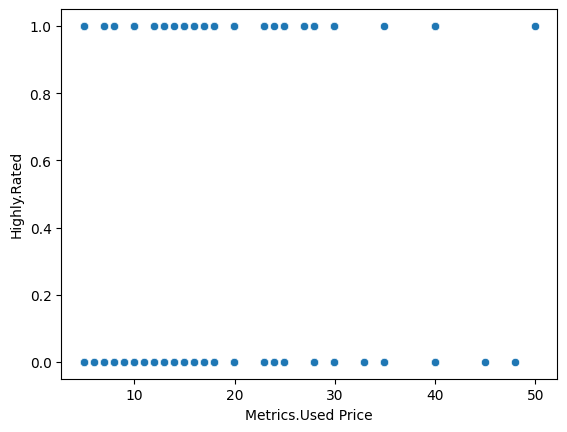

In [17]:
sns.scatterplot(x='Metrics.Used Price', y='Highly.Rated', data=df)
plt.show()

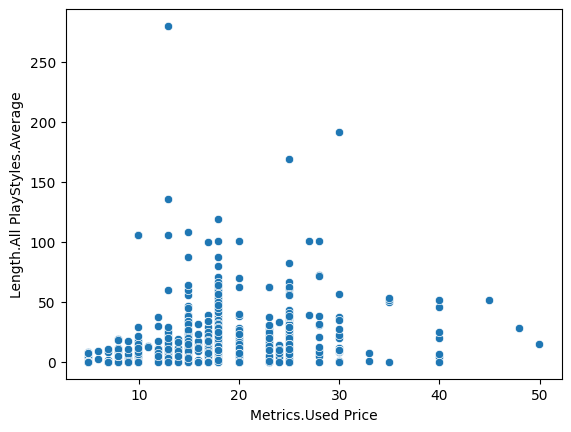

In [18]:
sns.scatterplot(x='Metrics.Used Price', y='Length.All PlayStyles.Average', data=df)
plt.show()

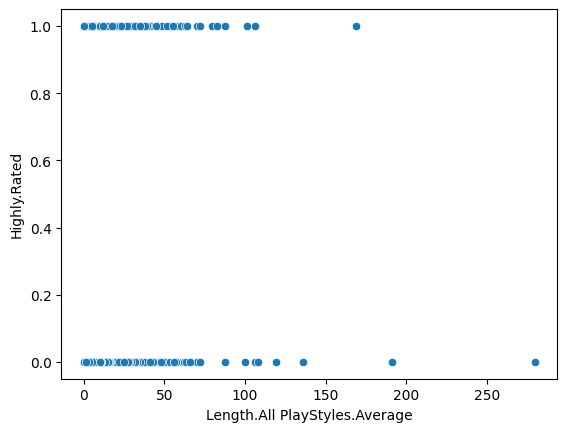

In [19]:
sns.scatterplot(x='Length.All PlayStyles.Average', y='Highly.Rated', data=df)
plt.show()

Identifying and managing outliers in scatterplots is critical to understanding the relationships between variables in an analysis. On the one hand, outliers can disrupt the visualization and make it difficult to detect patterns. Removing outliers makes the visualization clearer and improves interpretation, especially when fitting models or performing tests. Outliers can add noise and affect the accuracy of the model. However, on the flip side, outliers may contain meaningful information or represent extreme but valid data. Removing outliers risks losing valuable insights and may bias the analysis. In addition, excluding outliers may limit the applicability of the findings to a broader dataset, which may lead to misleading conclusions, especially if the outliers represent rare cases or specific subgroups.

And our team in this dataset will not delete any outliers so as not to lose any useful information.

Other Data Cleaning:

Becuse our team dicide not to drop any rows, so we will not choose additional method to try to drop rows.

## 4. Preliminary Analysis

KeyboardInterrupt: 

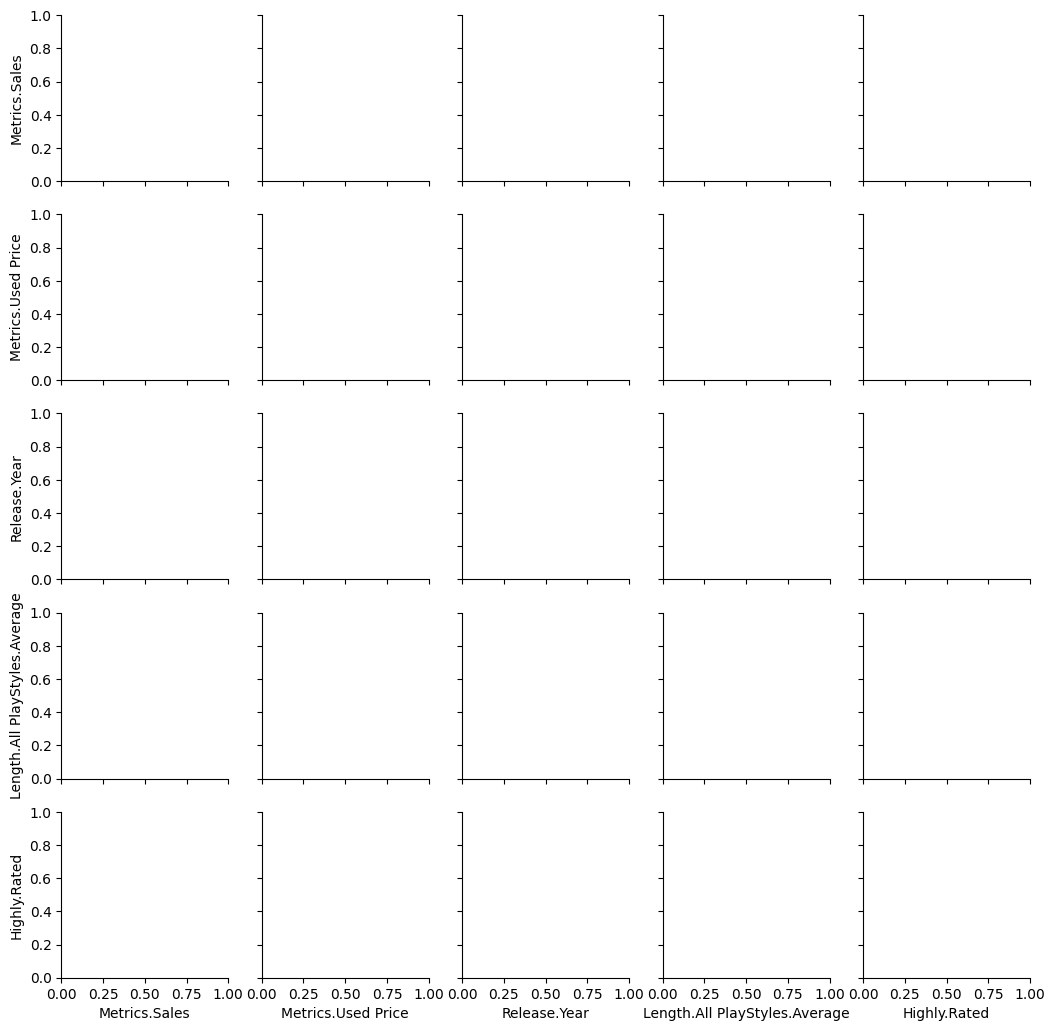

In [20]:
sns.pairplot(df)

Visualize the relationship between your explanatory variable and the response variable with the appropriate plot:

reponse(numerical) & categorical explanatries

In [ ]:
df.corr()

C:\Users\Afif\AppData\Local\Temp\ipykernel_16276\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Highly.Rated
Metrics.Sales,1.000000,0.261020,-0.008493,0.145171,0.318865
Metrics.Used Price,0.261020,1.000000,0.167679,0.200280,0.127596
Release.Year,-0.008493,0.167679,1.000000,0.022554,0.018078
Length.All PlayStyles.Average,0.145171,0.200280,0.022554,1.000000,0.195681
Highly.Rated,0.318865,0.127596,0.018078,0.195681,1.000000


Visualize the relationship between your explanatory variable and the response variable with the appropriate plot:

reponse(numerical) & categorical explanatries

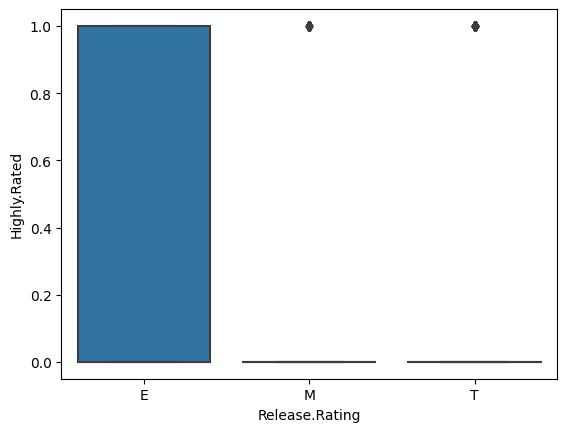

In [ ]:
sns.boxplot(x="Release.Rating",y='Highly.Rated',data=df)
plt.show()
#the relationship between reponse variable(review score) and the release rating

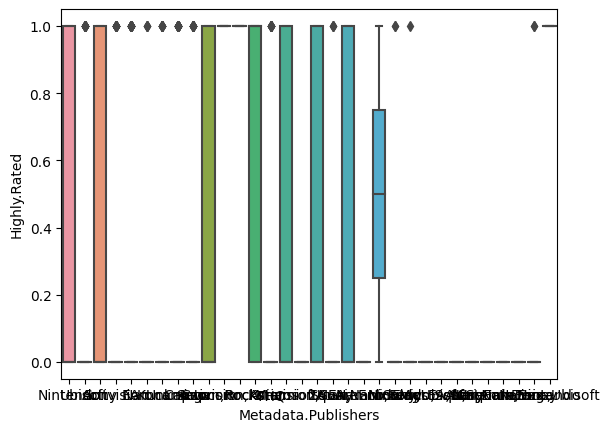

In [ ]:
sns.boxplot(x="Metadata.Publishers",y='Highly.Rated',data=df)
plt.show()
#the relationship between reponse variable(review score) and the publisher

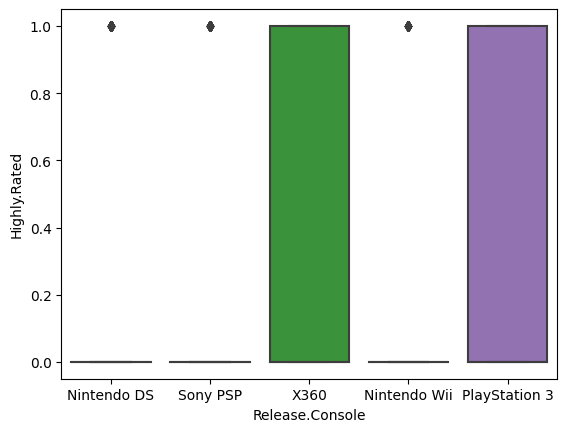

In [ ]:

sns.boxplot(x="Release.Console",y='Highly.Rated',data=df)
plt.show()
#the relationship between reponse variable(review score) and the release console

reponse(numerical) & numerical explanatoies

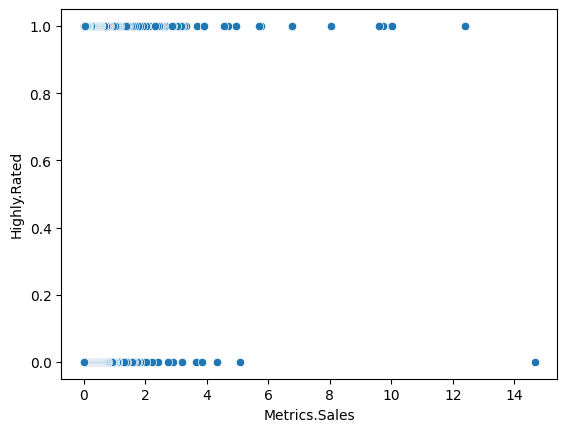

In [ ]:

sns.scatterplot(x='Metrics.Sales', y='Highly.Rated', data=df)
plt.show()
#the relationship between reponse variable(review score) and the sales

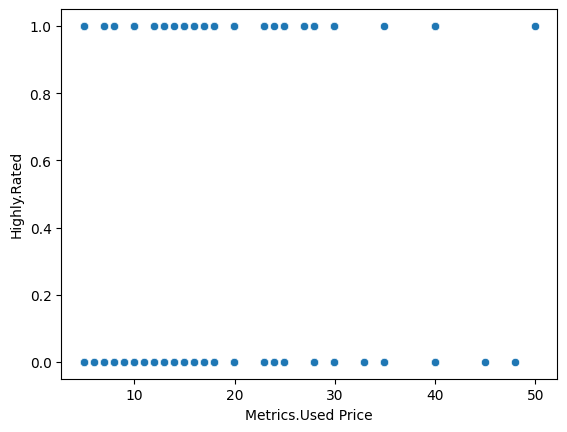

In [ ]:

sns.scatterplot(x='Metrics.Used Price', y='Highly.Rated', data=df)
plt.show()
#the relationship between reponse variable(review score) and the price

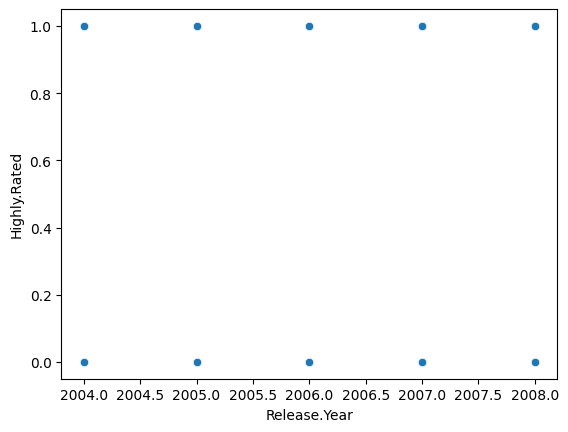

In [ ]:

sns.scatterplot(x='Release.Year', y='Highly.Rated', data=df)
plt.show()
#the relationship between reponse variable(review score) and the release year

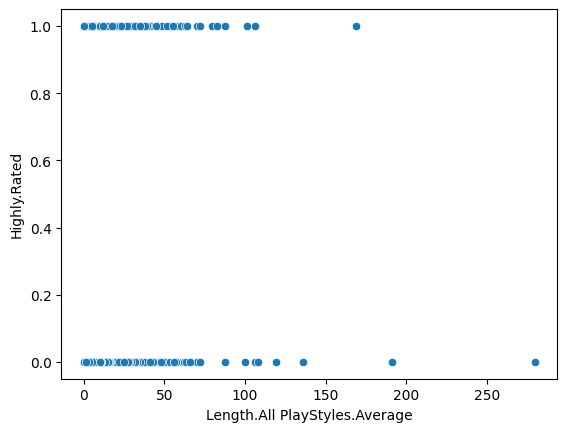

In [ ]:

sns.scatterplot(x='Length.All PlayStyles.Average', y='Highly.Rated', data=df)
plt.show()
#the relationship between reponse variable(review score) and the average play styles

Which explanatory variables have strong relationships with the response variable?
For numerical variables, Length.All PlayStyles.Average and Metrics sales has relatively high relationship with Highly.rated compared to other numerical variables with 0.318865 and 0.195681.
For categorical variables Metadata.publishers has a relationship with Highly.Rated becahse the boxplot betweem each other are least overlapped.

Which explanatory variables have weak relationships with the response variable?
For numerical variables, Release.Year and Featured.Max.Players has the weakest relationship with only 0.018078 and 0.094606, indicating the relationship is really low, almost close to 0.
For categorical variables, Release.Rating and Release.Caonsole is kind of weak with response variable, because they are highly overlapped.

Relationships between Explanatory Variable Pairs

<Axes: xlabel='Release.Rating'>

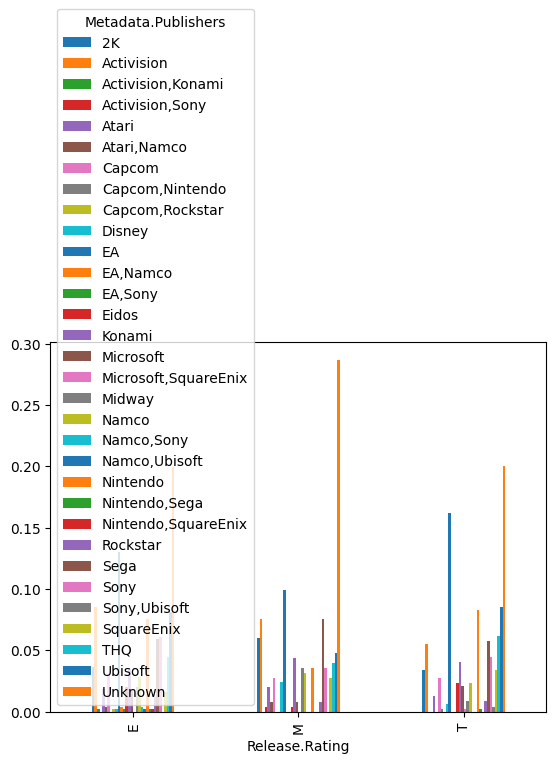

In [ ]:
temp3 = pd.crosstab(df['Release.Rating'], df['Metadata.Publishers'], normalize='index')
temp3.plot.bar()
# rating & publisher

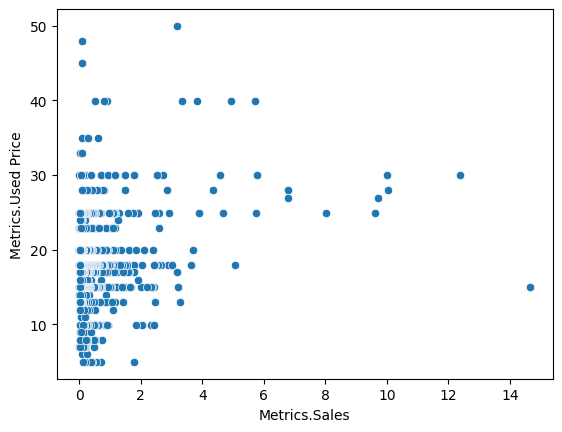

In [ ]:
sns.scatterplot(x='Metrics.Sales', y='Metrics.Used Price', data=df)
plt.show()

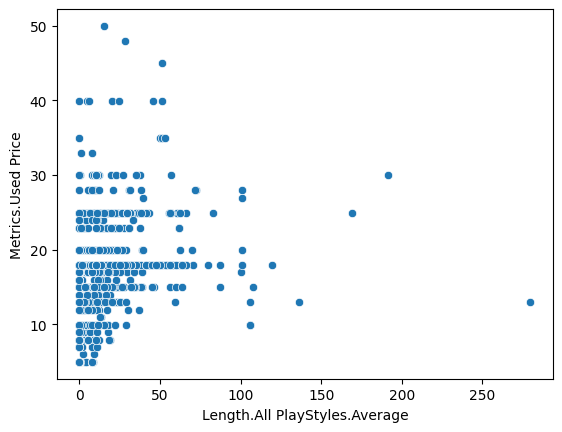

In [ ]:
sns.scatterplot(x='Length.All PlayStyles.Average', y='Metrics.Used Price', data=df)
plt.show()

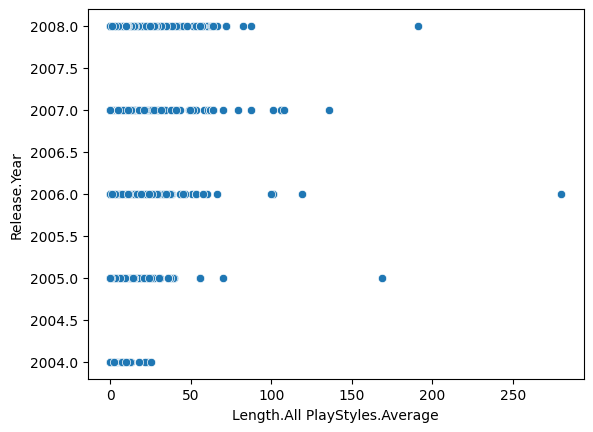

In [ ]:
sns.scatterplot(x='Length.All PlayStyles.Average', y='Release.Year', data=df)
plt.show()

In [ ]:
df.corr()

C:\Users\Afif\AppData\Local\Temp\ipykernel_16276\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Highly.Rated
Metrics.Sales,1.000000,0.261020,-0.008493,0.145171,0.318865
Metrics.Used Price,0.261020,1.000000,0.167679,0.200280,0.127596
Release.Year,-0.008493,0.167679,1.000000,0.022554,0.018078
Length.All PlayStyles.Average,0.145171,0.200280,0.022554,1.000000,0.195681
Highly.Rated,0.318865,0.127596,0.018078,0.195681,1.000000


 Are there any pairs of explanatory variables that have strong associations with each other?
 No. According to the graph and correlation data, none of two numerical variables has a result that larger than 0.8. In addition to this, the categorical graph is also different, which means there won't be a high correlationship for them.

## 5. Model Data Preprocessing

Here we create the features matrix & target array as well as scale both these appropriately in order to use it in our model selection.

In [ ]:
features_matrix = df.drop("Highly.Rated", axis = 1)
features_matrix

,Metadata.Publishers,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average
0,Nintendo,4.69,24.95,Nintendo DS,E,2004,22.716667
1,Ubisoft,0.56,14.95,Sony PSP,E,2004,10.100000
2,Nintendo,0.54,22.95,Nintendo DS,E,2004,4.566667
3,Sony,0.49,12.95,Sony PSP,E,2004,0.000000
4,Activision,0.45,14.95,Nintendo DS,E,2004,13.250000
...,...,...,...,...,...,...,...
1207,Unknown,0.03,17.95,Nintendo DS,M,2008,10.083333
1208,Unknown,0.03,17.95,Sony PSP,E,2008,0.000000
1209,Unknown,0.03,15.95,PlayStation 3,M,2008,0.000000
1210,Unknown,0.02,17.95,Nintendo Wii,M,2008,10.083333


created features matrix

In [ ]:
target_array = df["Highly.Rated"]
target_array

0       1
1       1
2       1
3       1
4       0
       ..
1207    0
1208    0
1209    0
1210    0
1211    0
Name: Highly.Rated, Length: 1212, dtype: int64

created target array

In [ ]:
scaler_o = StandardScaler()
scaled_expl_vars = scaler_o.fit_transform(features_matrix[["Metrics.Sales", "Metrics.Used Price", "Length.All PlayStyles.Average"]])
temp_df = pd.DataFrame(scaled_expl_vars, columns = ["Metrics.Sales", "Metrics.Used Price", "Length.All PlayStyles.Average"])
features_matrix["Metrics.Sales"] = temp_df["Metrics.Sales"]
features_matrix["Metrics.Used Price"] = temp_df["Metrics.Used Price"]
features_matrix["Length.All PlayStyles.Average"] = temp_df["Length.All PlayStyles.Average"]
features_matrix

,Metadata.Publishers,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average
0,Nintendo,3.915098,1.506130,Nintendo DS,E,2004,0.467452
1,Ubisoft,0.053151,-0.487132,Sony PSP,E,2004,-0.183256
2,Nintendo,0.034449,1.107478,Nintendo DS,E,2004,-0.468639
3,Sony,-0.012306,-0.885785,Sony PSP,E,2004,-0.704166
4,Activision,-0.049710,-0.487132,Nintendo DS,E,2004,-0.020794
...,...,...,...,...,...,...,...
1207,Unknown,-0.442450,0.110846,Nintendo DS,M,2008,-0.184115
1208,Unknown,-0.442450,0.110846,Sony PSP,E,2008,-0.704166
1209,Unknown,-0.442450,-0.287806,PlayStation 3,M,2008,-0.704166
1210,Unknown,-0.451801,0.110846,Nintendo Wii,M,2008,-0.184115


scaled numerical explanatory variables

In [ ]:
temp_df = features_matrix[["Metadata.Publishers", "Release.Console", "Release.Rating"]].astype("object")
temp_df = pd.get_dummies(temp_df)
features_matrix = pd.concat([features_matrix, temp_df], axis = 1)
features_matrix = features_matrix.drop(["Metadata.Publishers", "Release.Console", "Release.Rating"], axis=1)
features_matrix

,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Metadata.Publishers_2K,Metadata.Publishers_Activision,"Metadata.Publishers_Activision,Konami","Metadata.Publishers_Activision,Sony",Metadata.Publishers_Atari,"Metadata.Publishers_Atari,Namco",...,Metadata.Publishers_Ubisoft,Metadata.Publishers_Unknown,Release.Console_Nintendo DS,Release.Console_Nintendo Wii,Release.Console_PlayStation 3,Release.Console_Sony PSP,Release.Console_X360,Release.Rating_E,Release.Rating_M,Release.Rating_T
0,3.915098,1.506130,2004,0.467452,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.053151,-0.487132,2004,-0.183256,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0.034449,1.107478,2004,-0.468639,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,-0.012306,-0.885785,2004,-0.704166,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,-0.049710,-0.487132,2004,-0.020794,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,-0.442450,0.110846,2008,-0.184115,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1208,-0.442450,0.110846,2008,-0.704166,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1209,-0.442450,-0.287806,2008,-0.704166,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1210,-0.451801,0.110846,2008,-0.184115,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


created indicator variables for catgorical explanatory variables and added them to features matrix

## 6. Feature Selection with k-Fold Cross-Validation

We use the SequentialFeaturesSelector from scikit learn to perform forward selection for us, it defaults to using 5 fold CV for each iteration & we set a maximum limit on the number of features to select in order to keep the model simple due to the fact that we have 44 columns that were created when converting to indicator variables.

In [ ]:
cross_val = KFold(n_splits=5,shuffle = True, random_state= 207 )
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [ ]:
lin_reg_mod = LogisticRegression()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lin_reg_mod, n_features_to_select=10, direction="backward", scoring="roc_auc")
sfs.fit(features_matrix, target_array)

c:\Users\Afif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Afif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\Users\Afif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Afif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=10, scoring='roc_auc')

In [ ]:
sfs.get_feature_names_out()

array(['Metrics.Sales', 'Release.Year', 'Length.All PlayStyles.Average',
       'Metadata.Publishers_2K', 'Metadata.Publishers_Activision,Konami',
       'Metadata.Publishers_Activision,Sony', 'Metadata.Publishers_Atari',
       'Metadata.Publishers_Atari,Namco', 'Metadata.Publishers_Eidos',
       'Metadata.Publishers_Sony'], dtype=object)

## 7. Best Model Discussion

In [ ]:
dataset = pd.concat([features_matrix, target_array], axis=1)
dataset = dataset.rename(columns={"Length.All PlayStyles.Average": "LengthAllPlayStylesAverage", "Metrics.Sales": "Sales", "Release.Year": "ReleaseYear",
                                    "Metadata.Publishers_2K": "Publishers_2K", "Metadata.Publishers_Activision,Konami": "Publishers_ActivisionKonami", 
                                    "Metadata.Publishers_Activision,Sony": "Publishers_ActivisionSony", "Metadata.Publishers_Atari": "Publishers_Atari",
                                    "Metadata.Publishers_Atari,Namco": "Publishers_AtariNamco", "Metadata.Publishers_Eidos": "Publishers_Eidos", "Metadata.Publishers_Sony": "Publishers_Sony", "Highly.Rated": "HighlyRated"})
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=101, shuffle="True")

df_train

,Sales,Metrics.Used Price,ReleaseYear,LengthAllPlayStylesAverage,Publishers_2K,Metadata.Publishers_Activision,Publishers_ActivisionKonami,Publishers_ActivisionSony,Publishers_Atari,Publishers_AtariNamco,...,Metadata.Publishers_Unknown,Release.Console_Nintendo DS,Release.Console_Nintendo Wii,Release.Console_PlayStation 3,Release.Console_Sony PSP,Release.Console_X360,Release.Rating_E,Release.Rating_M,Release.Rating_T,HighlyRated
573,-0.171272,-0.885785,2007,-0.265776,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
34,0.548752,-0.088480,2005,0.070322,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
339,-0.386344,0.110846,2006,-0.439413,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
636,-0.283484,-0.487132,2007,-0.704166,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
121,-0.367642,0.110846,2005,-0.532248,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,-0.180623,0.110846,2007,0.255993,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
973,-0.161921,-0.487132,2008,-0.405029,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
75,-0.208676,-0.088480,2005,-0.441132,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
599,-0.218027,-0.487132,2007,-0.172081,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
fitted_model = smf.logit(formula="""HighlyRated ~ Sales + ReleaseYear + LengthAllPlayStylesAverage
                                                    + Publishers_2K + Publishers_ActivisionKonami + Publishers_ActivisionSony
                                                    + Publishers_Atari + Publishers_AtariNamco + Publishers_Eidos + Publishers_Sony""", data=df_train).fit()
fitted_model.summary()

         Current function value: 0.459091
         Iterations: 35


c:\Users\Afif\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            HighlyRated   No. Observations:                  969
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1528
Time:                        22:16:13   Log-Likelihood:                -444.86
converged:                      False   LL-Null:                       -525.12
Covariance Type:            nonrobust   LLR p-value:                 2.531e-29
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -48.7792    166.765     -0.293      0.770    -375.632     278.074
Sales                           1.0422      0.146      7.161      0.000       0.757       1.327
ReleaseYear                     0.0236      0.083      0.284      0.776      -0.139       0.186
LengthAllPlayStylesAverage      0.4100      0.088      4.676      0.000       0.238       0.582
Publishers_2K                   1.1682      0.353      3.306      0.001       0.476       1.861
Publishers_ActivisionKonami    15.3896   1827.317      0.008      0.993   -3566.086    3596.865
Publishers_ActivisionSony     -13.6392   1685.841     -0.008      0.994   -3317.827    3290.549
Publishers_Atari                0.3108      0.664      0.468      0.640      -0.990       1.612
Publishers_AtariNamco         -16.6747   5190.886     -0.003      0.997   -1.02e+04    1.02e+04
Publishers_Eidos               -1.0524      1.034     -1.018      0.309      -3.079       0.974
Publishers_Sony                 1.4600      0.322      4.538      0.000       0.829       2.090
===============================================================================================
"""

Our best model as chosen by our algorithim from part 6 has the following equation:


$\widehat{Logit(Highly.Rated)} = -48.7792 + 1.0422 * Sales + 0.0236 * ReleaseYear + 0.41 * LengthAllPlayStylesAverage
                                + 1.1682 * Publishers_{2K} + 15.3896* Publishers_{ActivisionKonami} + -13.6392 * Publishers_{ActivisionSony} + 0.3108 * Publishers_{Atari} 
                                + -16.6747 * Publishers_{AtariNamco} + -1.0524 * Publishers_{Eidos} + 1.4600 * Publishers_{Sony}$ 

Since we scaled the explanatory variables we are able to compared the slopes directly to each other, in this case we see that the Publisher being either Activision Konami, Activision Sony or Atari Namco are the most important explanatory varaibles since their slopes have the largest magnitude.


Next we will look at the ROC & AUC for this model to evaluate it. 

In [ ]:
phat_test = fitted_model.predict(df_test)
phat_test.head()

780    0.383438
665    0.137752
520    0.222713
115    0.117700
287    0.210226
dtype: float64

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fprs, tprs, thresholds = roc_curve(y_true=df_test['HighlyRated'],
y_score=phat_test)
auc = roc_auc_score(y_true=df_test['HighlyRated'],
y_score=phat_test)
auc

0.7703263535182041

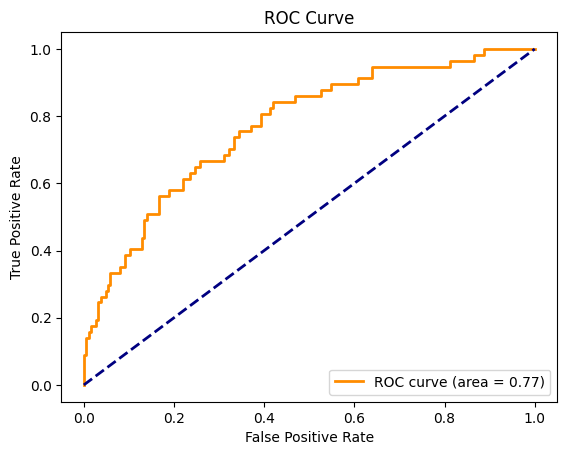

In [ ]:
plt.plot(fprs, tprs, color='darkorange', lw=2,
label='ROC curve (area = '+str(round(auc,3))+')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The test AUC score is 0.77 which is much lower than 1 so our model isn't very close to the perfect FPR & TPR, we can see this in the plot too as we don't have any classifications values that are very close to the perfect classification values. However, since our AUC value is closer to 1 than it is to 0.5, there is a test dataset classification that is much better than just randomly guessing. Our original research goals call for a better classifier of "positive" instances but we also want are FPR to be reasonably low so it is better than just guessing.

In [ ]:
print("Threshold: " + str(thresholds[50]))
print("Test TPR: " + str(tprs[50]))
print("Test FPR: " + str(fprs[50]))

Threshold: 0.1775240097769783
Test TPR: 0.7368421052631579
Test FPR: 0.3333333333333333


We see that a threshold of $\hat{p_o} = 0.177$ gives us the desired result from our research goals. We see from this that 73 percent of highly rated video games will be correctly classified as highly rated. While only 33 percent of not highly rated video games will be incorrectly classified as highly rated. The TPR value is also our sensitivity value, which is 0.73 and our sensitivty will be 1 - FPR which is 0.66.

## 8. Additional Analysis/Insight

In [21]:
new_df = pd.read_csv("video_games.csv", na_values = "Unknown")
new_df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


C:\Users\Afif\AppData\Local\Temp\ipykernel_28396\1325021926.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Metadata.Genres', y='Metrics.Review Score', data=new_df, ci=None, palette='viridis')


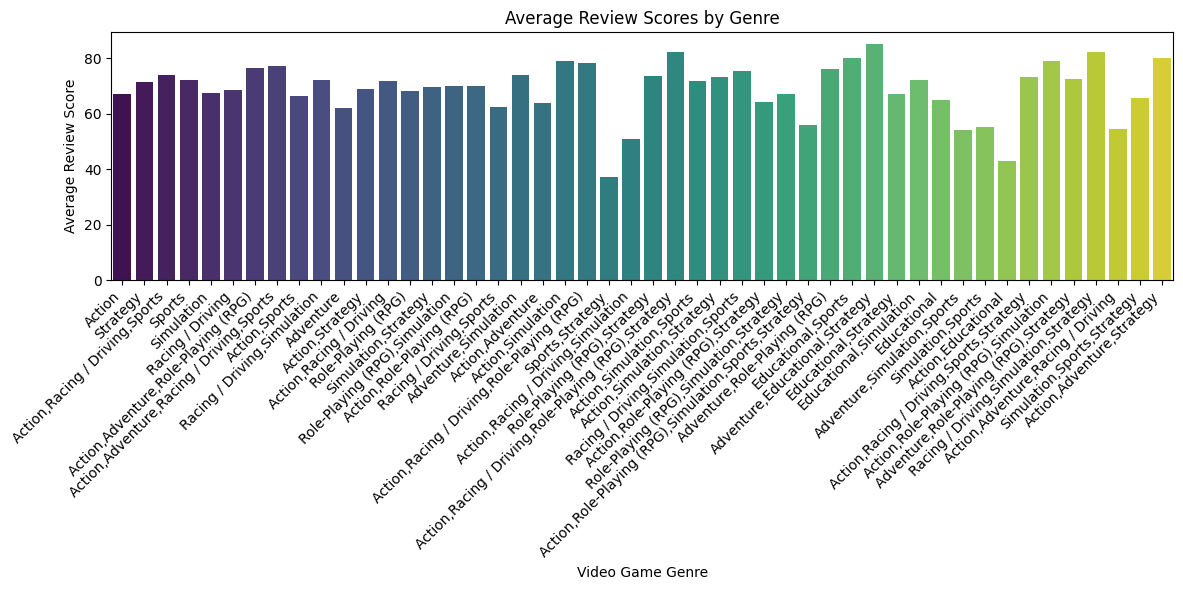

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Metadata.Genres', y='Metrics.Review Score', data=new_df, ci=None, palette='viridis')
plt.title('Average Review Scores by Genre')
plt.xlabel('Video Game Genre')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The resulting visualization from abve displays a bar plot with each bar representing the average review score for the different genres in the gaming industry. By utilizing this vizualiztion, developers can gain a better understanding into which genres tend to receive higher average review scores and, consequently, are more likely to be considered successful by players.

The insights from this visualization can contribute to the primary research goal of building a predictive model for "Highly Rated" video games. By gaining a better understanding how different genres correlate with review scores, developers can prioritize genres that historically perform well. This information can be incorporated into the model as a feature, futher enhancing its accuracy in predicting highly rated games.

## 9. Conclusion

## References